<a href="https://colab.research.google.com/github/KarlmerABC/ML_WaterQuality/blob/main/PCA_WaterQuality_ML_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install wget
!pip3 install opendatasets

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=d5e440ee48c087cbc6ad632c48cc18c6fb27ba24db6a876b4b06ce02065744b7
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import graphviz
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor # Import Random Forest Regressor
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
import wget

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/PCA5039_GrupoAgua/Base/wa_mensal_samples.csv', sep=',')
join = pd.read_csv('/content/drive/Shareddrives/PCA5039_GrupoAgua/Base/wa_perdate_satellite.csv', sep=',')

In [ ]:
# Visualização
print(join.shape)
print(join.head())
print(df.shape)
print(df.head())

(2040, 16)
  bands_sat        Date  Year  ...  RGDE02030  RGDE02200  RGDE02900
0    B01_L8  2016-04-18  2016  ...     0.0116     0.0179     0.0198
1    B01_L8  2016-05-04  2016  ...        NaN        NaN     0.0395
2    B01_L8  2016-07-07  2016  ...     0.0143     0.0171     0.0301
3    B01_L8  2016-07-23  2016  ...        NaN     0.0186     0.0484
4    B01_L8  2016-08-24  2016  ...     0.0294     0.0292        NaN

[5 rows x 16 columns]
(409, 7)
       class  Year  Month  oxig_mgl  dbo_mgl  turb  clor_a_microgl
0  PIRE02900  2016      1       0.2      9.0   9.8             0.6
1  BILL02030  2013      9       0.4      9.0  10.6             NaN
2  PIRE02900  2015      5       0.4     47.0  13.1             1.3
3  PIRE02900  2015      2       0.4     22.0  10.4             1.3
4  PIRE02900  2019     10       0.6     13.0   9.9             0.6


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from datetime import datetime
join_mod = join.melt(['bands_sat','Date','Year','Month','Day'], var_name='class', value_name='value')
join_mod['Date'] = pd.to_datetime(join_mod['Date'], format='%Y-%m-%d')
join_mod2 = join_mod.groupby(['bands_sat','class','Year','Month'])['value'].mean()
join_mod2 = pd.DataFrame(join_mod2).reset_index() # df = pd.DataFrame(data)
join_mod2 = join_mod2.pivot_table('value', ['class','Year','Month'], 'bands_sat').reset_index()
join_mod2.rename_axis(None, axis=1, inplace=True)

In [ ]:
print(df.head)
print(join_mod2)

<bound method NDFrame.head of          class  Year  Month  oxig_mgl  dbo_mgl   turb  clor_a_microgl
0    PIRE02900  2016      1       0.2      9.0   9.80             0.6
1    BILL02030  2013      9       0.4      9.0  10.60             NaN
2    PIRE02900  2015      5       0.4     47.0  13.10             1.3
3    PIRE02900  2015      2       0.4     22.0  10.40             1.3
4    PIRE02900  2019     10       0.6     13.0   9.90             0.6
..         ...   ...    ...       ...      ...    ...             ...
404  GADE02900  2016     10      52.2      3.0  11.20             0.6
405  GADE02900  2016      1      58.0      3.0   7.10             0.6
406  GADE02900  2016      5      71.0      3.0   7.70             0.6
407  GADE02900  2016      4     266.7      7.0  13.60             0.6
408  BILL02030  2019      3       NaN      3.0   9.33             NaN

[409 rows x 7 columns]>
         class  Year  Month  ...  swir1_S2  swir2_S2  waterVapor_S2
0    BILL02030  2016      1  ...  0.0

In [ ]:
dfs_merge = pd.merge(df, join_mod2, on=['class','Year','Month'])
dfcrd = dfs_merge
#print(dfcrd.describe()) 
#print(dfcrd.info())
df = dfcrd

# **FASE 1 - ANALISE EXPLORATORIA DOS DADOS**

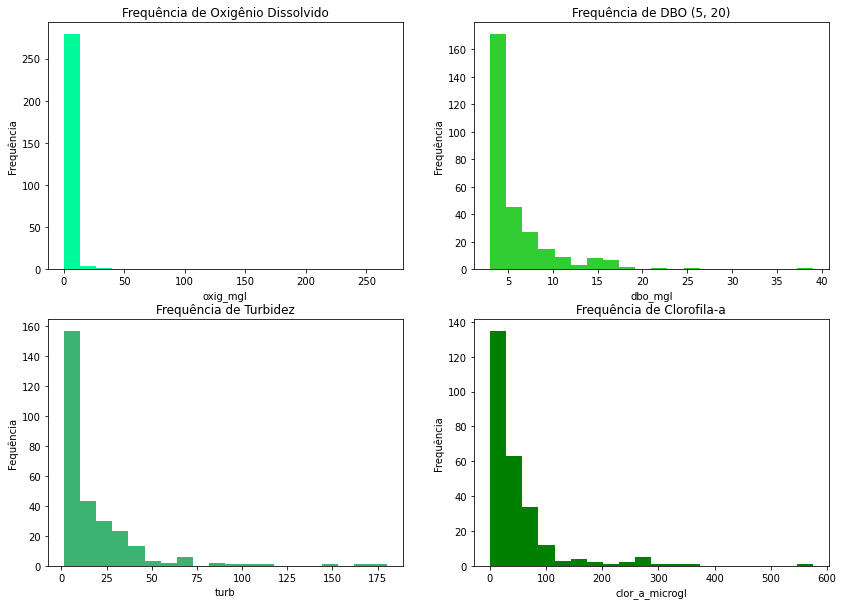

In [ ]:
plt.figure(figsize=[14,10])


plt.subplot(221)
plt.hist(dfcrd['oxig_mgl'],bins=20,color='mediumspringgreen')
plt.xlabel('oxig_mgl')
plt.ylabel('Frequência')
plt.title('Frequência de Oxigênio Dissolvido');


plt.subplot(222)
plt.hist(dfcrd['dbo_mgl'],bins=20,color='limegreen')
plt.xlabel('dbo_mgl')
plt.ylabel('Frequência')
plt.title('Frequência de DBO (5, 20)');


plt.subplot(223)
plt.hist(dfcrd['turb'],bins=20,color='mediumseagreen')
plt.xlabel('turb')
plt.ylabel('Fequência')
plt.title('Frequência de Turbidez');


plt.subplot(224)
plt.hist(dfcrd['clor_a_microgl'],bins=20,color='green')
plt.xlabel('clor_a_microgl')
plt.ylabel('Frequência')
plt.title('Frequência de Clorofila-a');

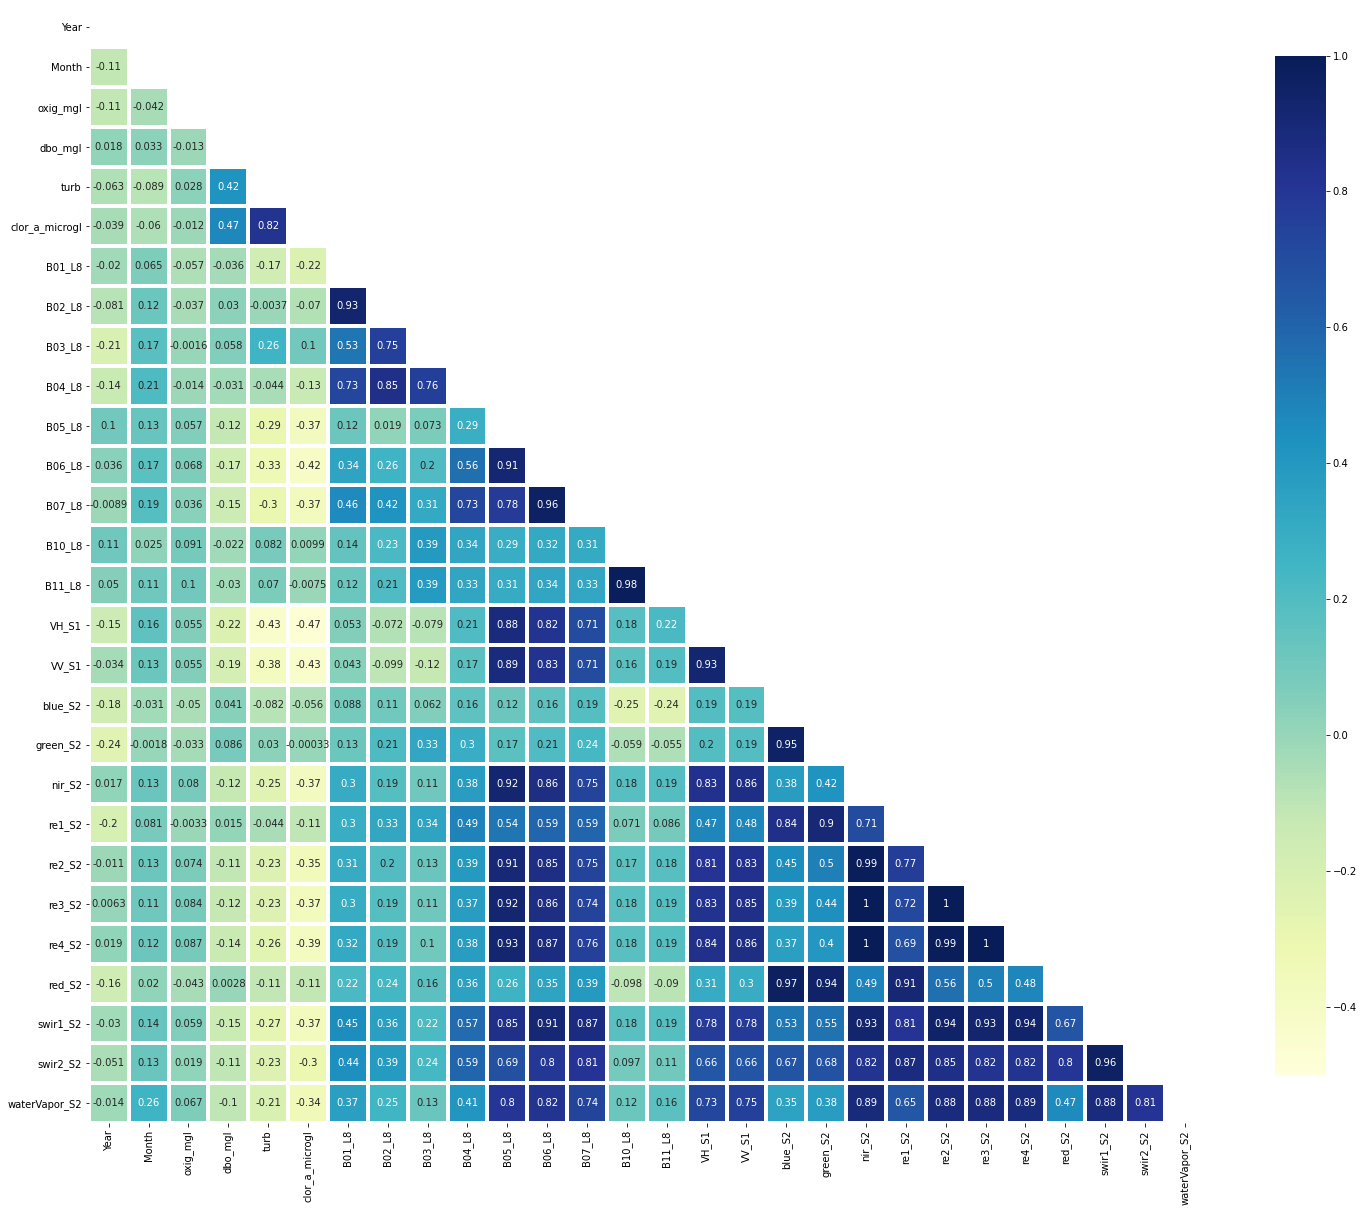

In [ ]:
mapa = df.select_dtypes(include = ['int64', 'float64']).corr();

mascara = np.zeros_like(mapa, dtype = np.bool)
mascara[np.triu_indices_from(mascara)] = True
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(mapa, mask = mascara, vmin = -0.5, vmax = 1, annot = True,
square = True, linewidths = 3, cbar_kws = {"shrink": 0.75}, cmap="YlGnBu");

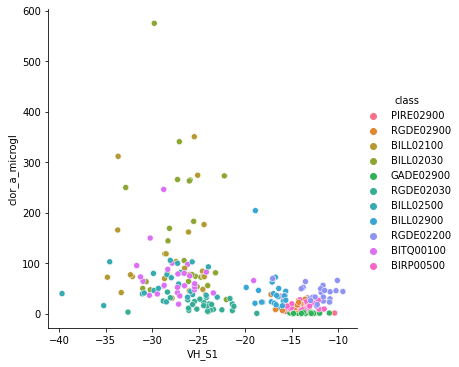

In [ ]:
sns.relplot(x="VH_S1", y="clor_a_microgl", 
            data=df,
            kind='scatter',
            hue='class');

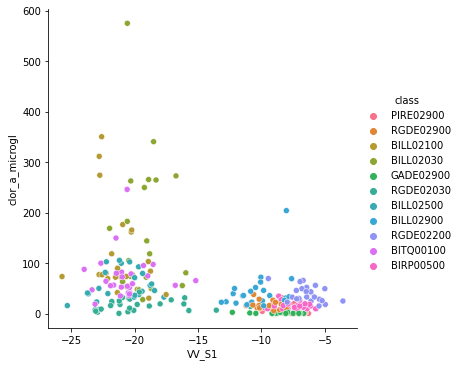

In [ ]:
sns.relplot(x="VV_S1", y="clor_a_microgl", 
            data=df,
            kind='scatter',
            hue='class');

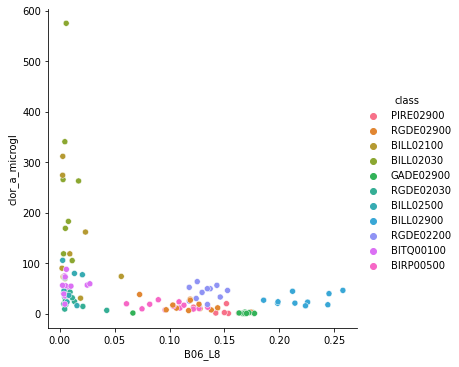

In [ ]:
sns.relplot(x="B06_L8", y="clor_a_microgl", 
            data=df,
            kind='scatter',
            hue='class');

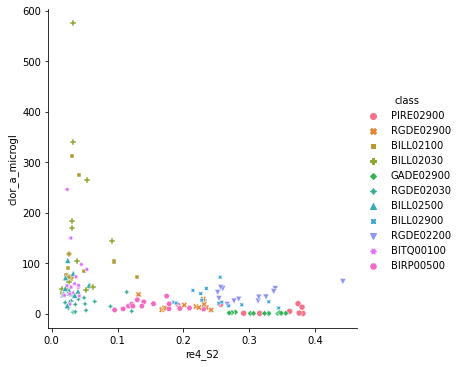

In [ ]:
sns.relplot(x="re4_S2", y="clor_a_microgl", 
            data=df,
            kind='scatter',
            hue='class',
            style='class');

In [ ]:
# Extract Column Names of a Pandas Dataframe
df.columns.tolist()

['class',
 'Year',
 'Month',
 'oxig_mgl',
 'dbo_mgl',
 'turb',
 'clor_a_microgl',
 'B01_L8',
 'B02_L8',
 'B03_L8',
 'B04_L8',
 'B05_L8',
 'B06_L8',
 'B07_L8',
 'B10_L8',
 'B11_L8',
 'VH_S1',
 'VV_S1',
 'blue_S2',
 'green_S2',
 'nir_S2',
 're1_S2',
 're2_S2',
 're3_S2',
 're4_S2',
 'red_S2',
 'swir1_S2',
 'swir2_S2',
 'waterVapor_S2']

In [ ]:
"""
#################### Sentinel 2
'blue_S2' -> B2 - 10 metros
'green_S2' -> B3 - 10 metros
'nir_S2' -> B8 - 10 metros
're1_S2' -> B5 - 20 metros
're2_S2' -> B6 - 20 metros
're3_S2' -> B7 - 20 metros
're4_S2' -> B8A - 20 metros
'red_S2' -> B4 - 10 metros
'swir1_S2' -> B11 - 20 metros
'swir2_S2' -> B12 - 20 metros 
'waterVapor_S2' -> B9 - 60 metros

#################### Landsat 8
'B01_L8' -> Band 1 (ultra blue) surface reflectance
'B02_L8' -> Band 2 (blue) surface reflectance	
'B03_L8' -> Band 3 (green) surface reflectance	
'B04_L8' -> Band 4 (red) surface reflectance
'B05_L8' -> Band 5 (near infrared) surface reflectance
'B06_L8' -> Band 6 (shortwave infrared 1) surface reflectance
'B07_L8' -> Band 7 (shortwave infrared 2) surface reflectance
'B10_L8' -> Band 10 brightness temperature. This band, while originally collected with a resolution of 100m / pixel, has been resampled using cubic convolution to 30m.	
'B11_L8' -> Band 11 brightness temperature. This band, while originally collected with a resolution of 100m / pixel, has been resampled using cubic convolution to 30m.
 """

"\n#################### Sentinel 2\n'blue_S2' -> B2 - 10 metros\n'green_S2' -> B3 - 10 metros\n'nir_S2' -> B8 - 10 metros\n're1_S2' -> B5 - 20 metros\n're2_S2' -> B6 - 20 metros\n're3_S2' -> B7 - 20 metros\n're4_S2' -> B8A - 20 metros\n'red_S2' -> B4 - 10 metros\n'swir1_S2' -> B11 - 20 metros\n'swir2_S2' -> B12 - 20 metros \n'waterVapor_S2' -> B9 - 60 metros\n\n#################### Landsat 8\n'B01_L8' -> Band 1 (ultra blue) surface reflectance\n'B02_L8' -> Band 2 (blue) surface reflectance\t\n'B03_L8' -> Band 3 (green) surface reflectance\t\n'B04_L8' -> Band 4 (red) surface reflectance\n'B05_L8' -> Band 5 (near infrared) surface reflectance\n'B06_L8' -> Band 6 (shortwave infrared 1) surface reflectance\n'B07_L8' -> Band 7 (shortwave infrared 2) surface reflectance\n'B10_L8' -> Band 10 brightness temperature. This band, while originally collected with a resolution of 100m / pixel, has been resampled using cubic convolution to 30m.\t\n'B11_L8' -> Band 11 brightness temperature. This band

In [ ]:
# Calculo dos indices L8, S1 e S2
arquivo = df

# Sentinel-1
arquivo['rVVVH_S1'] = arquivo['VV_S1']/arquivo['VH_S1'] # Ratio VV/VH
arquivo['RVI_S1'] = (4*arquivo['VH_S1'])/(arquivo['VH_S1'] + arquivo['VV_S1']) # Radar Vegetation Index (RVI)

# Sentinel-2
arquivo['NDVI_S2'] = (arquivo['nir_S2']-arquivo['red_S2'])/(arquivo['nir_S2']+arquivo['red_S2'])
arquivo['NDWI_S2'] = (arquivo['nir_S2']-arquivo['green_S2'])/(arquivo['nir_S2']+arquivo['green_S2'])
arquivo['EVI_S2'] = 2.5*(arquivo['nir_S2']-arquivo['red_S2'])/((arquivo['nir_S2']+6*arquivo['red_S2']-7.5*arquivo['blue_S2'])+1)
arquivo['SAVI_S2'] = ((arquivo['nir_S2']-arquivo['red_S2'])*1.5)/(arquivo['nir_S2']+arquivo['red_S2']+0.5)
arquivo['2BDA_S2'] = (arquivo['re1_S2'])/(arquivo['red_S2'])
arquivo['3BDA_S2'] = (1/arquivo['red_S2']) - (1/arquivo['re1_S2'])*(arquivo['re4_S2'])
arquivo['NDCI_S2'] = (arquivo['re1_S2']) - (arquivo['red_S2']/arquivo['re1_S2']) + (arquivo['red_S2'])
arquivo['FLHv_S2'] = (arquivo['green_S2']) - (arquivo['red_S2'] + arquivo['blue_S2'] - arquivo['red_S2']) # FLH_violet

# Landsat-8
arquivo['NDVI_L8'] = (arquivo['B05_L8']-arquivo['B04_L8'])/(arquivo['B05_L8']+arquivo['B04_L8'])
arquivo['NDWI_L8'] = (arquivo['B05_L8']-arquivo['B03_L8'])/(arquivo['B05_L8']+arquivo['B03_L8'])
arquivo['EVI_L8'] = 2.5*(arquivo['B05_L8']-arquivo['B04_L8'])/((arquivo['B05_L8']+6*arquivo['B04_L8']-7.5*arquivo['B02_L8'])+1)
arquivo['SAVI_L8'] = ((arquivo['B05_L8']-arquivo['B04_L8'])*1.5)/(arquivo['B05_L8']+arquivo['B04_L8']+0.5)
arquivo['2BDA_L8'] = (arquivo['B05_L8'])/(arquivo['B04_L8'])
arquivo['3BDA_L8'] = (arquivo['B02_L8']) - (arquivo['B04_L8']/arquivo['B03_L8'])
arquivo['NDCI_L8'] = (arquivo['B05_L8']) - (arquivo['B04_L8']/arquivo['B05_L8']) + (arquivo['B04_L8'])
arquivo['FLHv_L8'] = (arquivo['B03_L8']) - (arquivo['B04_L8'] + arquivo['B01_L8'] - arquivo['B04_L8']) # FLH_violet

#**FASE 2 - ANALISE INICIAL** - Matriz de Correlação e Importância de Variáveis

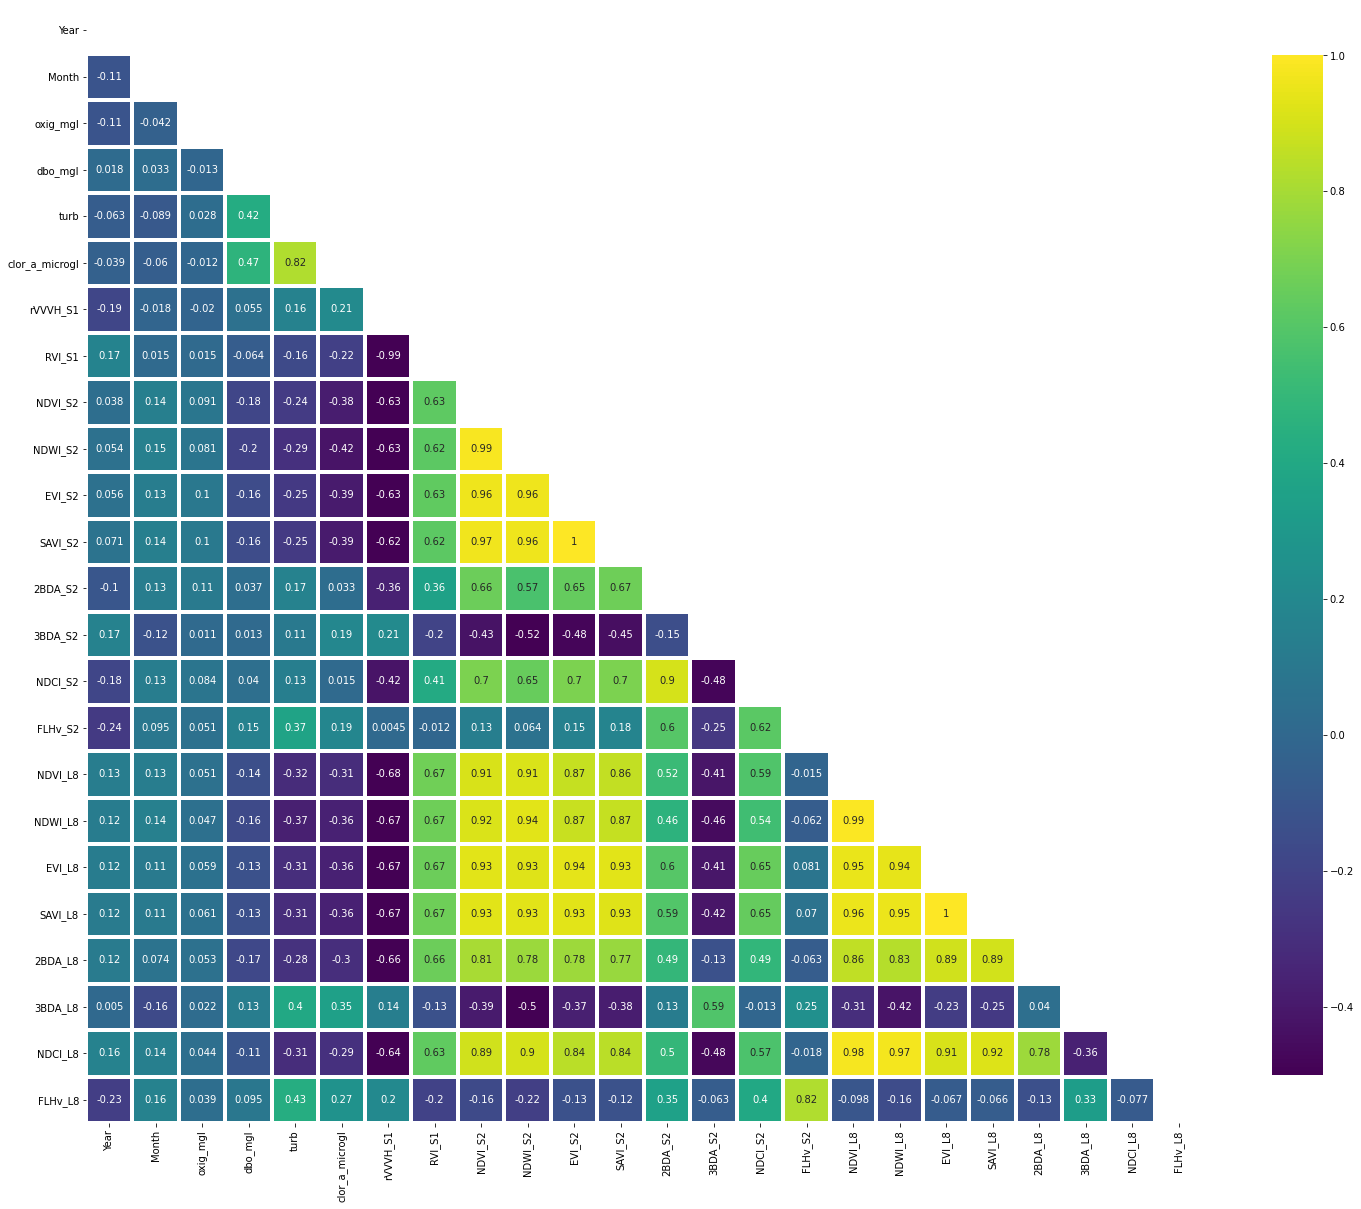

In [ ]:
df_mod = arquivo.loc[:, ['Year','Month','oxig_mgl','dbo_mgl','turb','clor_a_microgl','rVVVH_S1',	'RVI_S1',	'NDVI_S2','NDWI_S2','EVI_S2','SAVI_S2','2BDA_S2','3BDA_S2','NDCI_S2','FLHv_S2','NDVI_L8','NDWI_L8','EVI_L8','SAVI_L8','2BDA_L8','3BDA_L8','NDCI_L8','FLHv_L8']]
mapa2 = df_mod.select_dtypes(include = ['int64', 'float64']).corr();

mascara = np.zeros_like(mapa2, dtype = np.bool)
mascara[np.triu_indices_from(mascara)] = True
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(mapa2, mask = mascara, vmin = -0.5, vmax = 1, annot = True,
square = True, linewidths = 3, cbar_kws = {"shrink": 0.75}, cmap="viridis");


#**Divisão dos dados** - dfmod1(clor_a_microgl) e dfmod2(Turbidez)

In [ ]:
# Organização dos dados TOTAL
dfmod = arquivo

# Organização dos dados PARTE I - Clorofila A
dfmod1 = dfmod.drop(['class','Year','Month','oxig_mgl','dbo_mgl','turb'], axis=1)
#arquivo = arquivo.dropna()
dfmod1 = dfmod1.fillna(0)

# Organização dos dados PARTE II - Turbidez
dfmod2 = dfmod.drop(['class','Year','Month','oxig_mgl','dbo_mgl','clor_a_microgl'], axis=1)
#arquivo = arquivo.dropna()
dfmod2 = dfmod2.fillna(0)

# arquivo.fillna(0)
print(dfmod1.shape)
print(dfmod2.shape)

(290, 41)
(290, 41)


# FASE 3A - ANALISES RELACIONADAS A RELEVÂNCIA DAS VARIAVEIS - **CLOROFILA A**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import random

random.seed(10)
# Carregando dataset
data = dfmod1
X = data.drop(['clor_a_microgl'], axis=1)
y = data['clor_a_microgl']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)# Treinando modelo
model  = DecisionTreeRegressor(random_state=26)
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_
#Out

array([3.49469019e-05, 7.73743997e-03, 3.68980643e-03, 4.28303241e-06,
       1.57181871e-03, 2.28163892e-03, 1.75429998e-04, 4.01881464e-03,
       5.10251560e-04, 3.16858797e-01, 1.02791931e-01, 8.30937910e-04,
       1.66809340e-03, 7.91706429e-04, 9.03106927e-05, 4.51758223e-04,
       0.00000000e+00, 4.01559107e-04, 2.92316044e-05, 2.69337100e-03,
       1.79542370e-05, 1.48564705e-04, 1.28918716e-02, 2.43038414e-01,
       1.34309951e-04, 2.55227259e-04, 2.51674161e-04, 8.22133884e-03,
       6.70302724e-03, 4.98575984e-04, 4.82156819e-02, 7.07535281e-03,
       5.15468639e-06, 6.52143789e-04, 5.69009847e-04, 1.32102788e-01,
       3.25586740e-03, 8.32743958e-02, 4.43498671e-03, 1.62153468e-03])

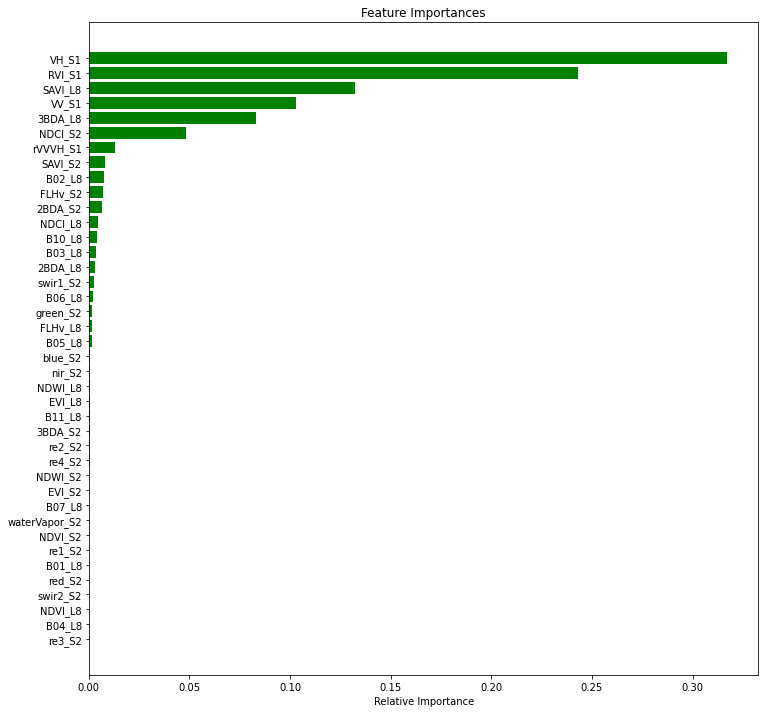

In [ ]:
features = X.columns.values
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=[12,12])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

# FASE 3B - ANALISES RELACIONADAS A RELEVÂNCIA DAS VARIAVEIS - **TURBIDEZ**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns

random.seed(10)
# Carregando dataset
data = dfmod2
X = data.drop(['turb'], axis=1)
y = data['turb']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)# Treinando modelo
model  = DecisionTreeRegressor(random_state=26)
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_
#Out

array([1.14486224e-04, 1.75440294e-04, 1.58643442e-04, 1.12500982e-03,
       0.00000000e+00, 6.50936184e-03, 3.90170786e-07, 4.77166554e-02,
       3.36685597e-04, 2.69246773e-01, 1.77027500e-01, 2.77454781e-06,
       1.20803812e-03, 5.27978082e-03, 4.07535225e-03, 6.99417261e-06,
       4.72268500e-04, 5.46953382e-05, 1.40461483e-06, 1.46618874e-02,
       1.77058058e-04, 1.11561099e-03, 5.13308424e-02, 1.88972165e-01,
       3.15412619e-05, 2.50682563e-03, 2.65358083e-03, 0.00000000e+00,
       5.36242680e-02, 4.37968818e-03, 8.66233602e-02, 4.03524879e-02,
       2.62254700e-02, 6.32900368e-05, 9.03534386e-05, 6.55920444e-05,
       3.54925359e-04, 1.03661586e-02, 9.06428462e-04, 1.98621166e-03])

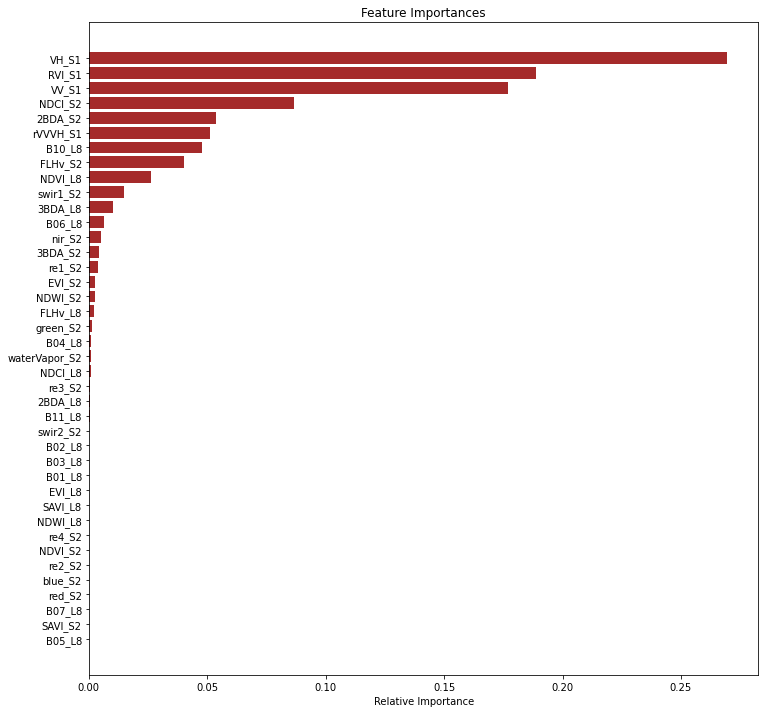

In [ ]:
features = X.columns.values
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=[12,12])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='brown', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
"""
    Avaliação e interpretação dos resultados

"""

'\n    Avaliação e interpretação dos resultados\n\n'

# FASE 4A - TÉCNICAS DE MACHINE LEARNING - **CLOROFILA**

**PARTE I - Clorofila A**



In [ ]:
random.seed(10)
# Linear Regression
X = dfmod1.loc[:,dfmod1.columns != 'clor_a_microgl']
y = dfmod1.clor_a_microgl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 48)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

errors = y_pred - y_test
errors.shape

(116,)

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
scores = cross_val_score(reg, X, y, scoring='r2', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: -0.215 (1.036)


In [ ]:
y_pred = reg.predict(X_test)
result = pd.DataFrame({"prediction": y_pred, "actual_clorA": y_test})
result.sample(10)

,prediction,actual_clorA
53,51.604246,0.0
253,79.569238,102.5
179,17.792967,16.2
213,1.409094,17.1
215,11.321731,52.1
186,11.818106,9.6
181,-7.787744,20.9
202,-35.184183,26.7
212,86.167537,99.8
120,33.848120,9.1


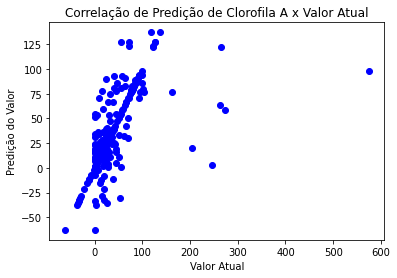

In [ ]:
predicao = y_pred
teste = result

plt.xlabel('Valor Atual')
plt.ylabel('Predição do Valor')
plt.title('Correlação de Predição de Clorofila A x Valor Atual')
plt.plot(teste, predicao, 'bo')
plt.show()

In [ ]:
#=====================================#
# Model 01 ___ KNNeighbors Regressor
#=====================================#

In [ ]:
import statistics

resultado_final = {}

In [ ]:
random.seed(10)
modeloknn = KNeighborsRegressor(n_neighbors=3,metric='euclidean')
modeloknn.fit(X_train,y_train);

y_pred = modeloknn.predict(X_test);
knn_reg_pre = y_pred

# R Square Error
r2 = r2_score(y_test,y_pred);
r2 = str(round(r2, 2))
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,y_pred);
mae = str(round(mae, 2))
# Mean Square Error (MSE)
mse = mean_squared_error(y_test,y_pred, squared=True);
mse = str(round(mse, 2))
# Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_test,y_pred, squared=False);
rmse = str(round(rmse, 2))

print('KNN Regressor accuracy: ')
crossr = cross_val_score(estimator = modeloknn, X = X_train, y = y_train, cv = 5,verbose = 0)
crossr = str(round(statistics.mean(crossr), 2))

print("Cross val:", crossr)
print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

resultado_final['KNN'] = {'Cross val':crossr,'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

KNN Regressor accuracy: 
Cross val: -0.61
R2  : -0.23
MAE : 42.84
MSE : 6464.73
RMSE: 80.4


In [ ]:
#=====================================#
# Model 02 ___ Linear Regressor
#=====================================#

In [ ]:
random.seed(10)
regressao = LinearRegression()
regressao.fit(X_train, y_train);

y_pred = regressao.predict(X_test);
lr_reg_pre = y_pred

r2 = r2_score(y_test,y_pred);
r2 = str(round(r2, 2))
mae = mean_absolute_error(y_test,y_pred);
mae = str(round(mae, 2))
mse = mean_squared_error(y_test,y_pred, squared=True);
mse = str(round(mse, 2))
rmse = mean_squared_error(y_test,y_pred, squared=False);
rmse = str(round(rmse, 2))

print('Linear Regression Regressor accuracy: ')
crossr = cross_val_score(estimator = regressao, X = X_train, y = y_train, cv = 5,verbose = 0)
crossr = str(round(statistics.mean(crossr), 2))

print("Cross val:", crossr)
print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

resultado_final['Linear Regression'] = {'Cross val':crossr,'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

Linear Regression Regressor accuracy: 
Cross val: -0.52
R2  : 0.12
MAE : 36.49
MSE : 4612.28
RMSE: 67.91


In [ ]:
#=====================================#
# Model 03 ___ Decision Tree Regressor
#=====================================#

In [ ]:
random.seed(10)
modelo_dt = DecisionTreeRegressor(random_state=26)
modelo_dt.fit(X_train, y_train);

y_pred = modelo_dt.predict(X_test);
dt_reg_pre = y_pred

r2 = r2_score(y_test,y_pred);
r2 = str(round(r2, 2))
mae = mean_absolute_error(y_test,y_pred);
mae = str(round(mae, 2))
mse = mean_squared_error(y_test,y_pred, squared=True);
mse = str(round(mse, 2))
rmse = mean_squared_error(y_test,y_pred, squared=False);
rmse = str(round(rmse, 2))

print('Decision Tree Regressor accuracy: ')
crossr = cross_val_score(estimator = modelo_dt, X = X_train, y = y_train, cv = 5,verbose = 0)
crossr = str(round(statistics.mean(crossr), 2))

print('Cross val:',crossr)
print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

resultado_final['Decision Tree'] = {'Cross val':crossr,'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

Decision Tree Regressor accuracy: 
Cross val: -0.91
R2  : -0.6
MAE : 47.1
MSE : 8414.95
RMSE: 91.73


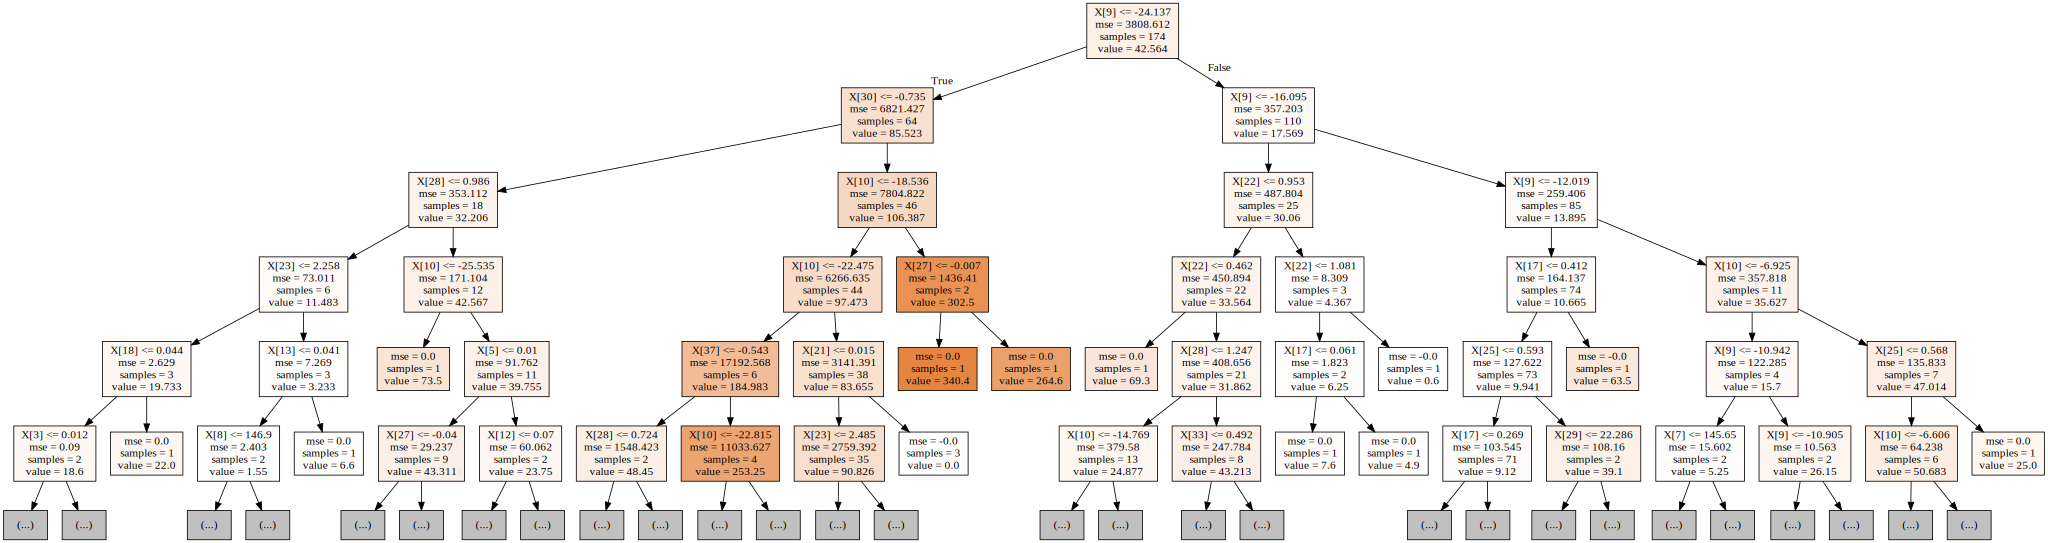

In [ ]:
dot_data = tree.export_graphviz(modelo_dt,max_depth=5, out_file=None,filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph


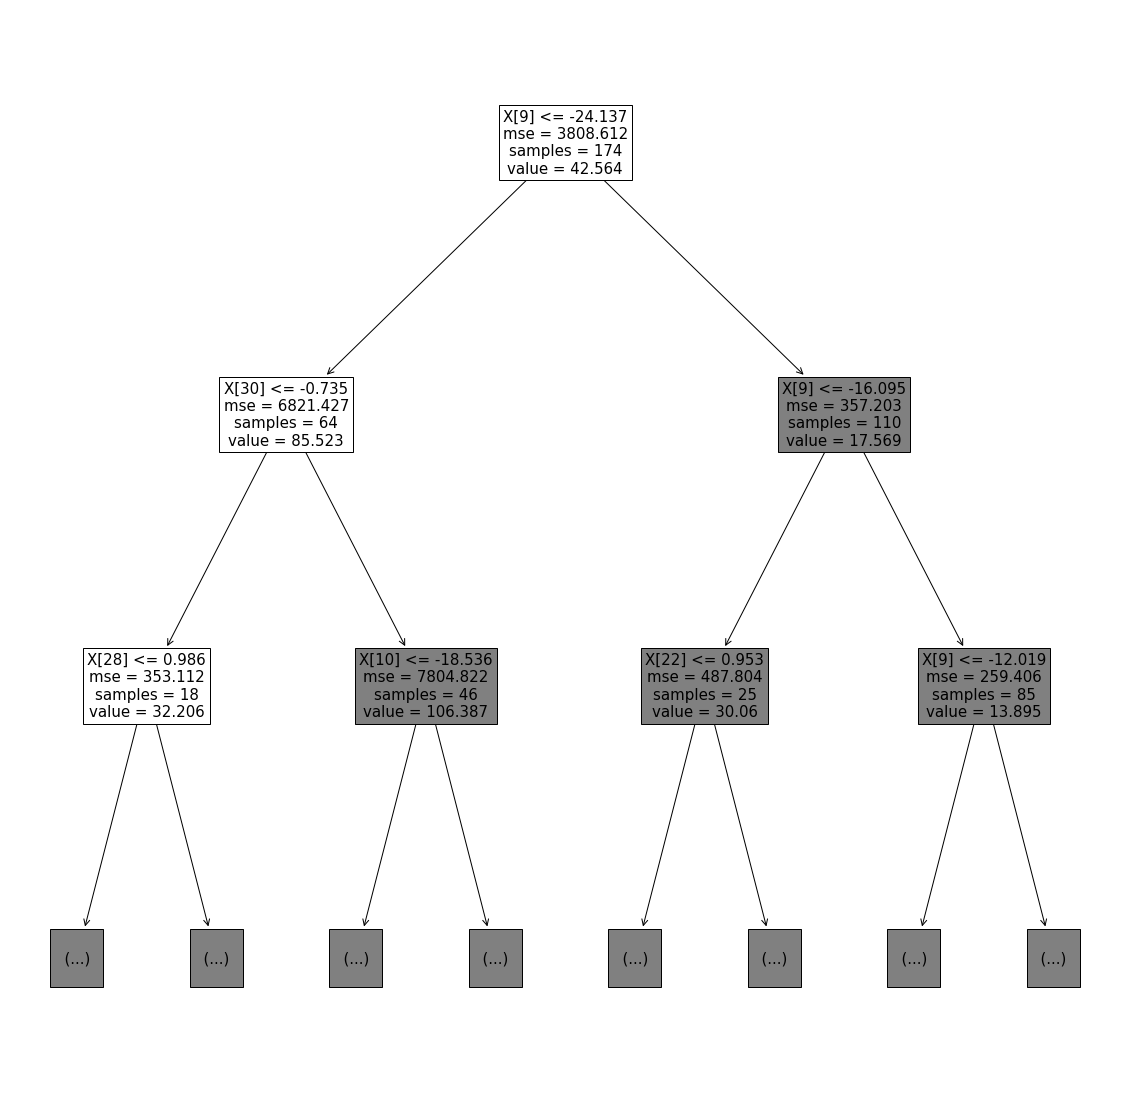

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(modelo_dt, max_depth = 2, fontsize=15)
plt.show()

In [ ]:
#=====================================#
# Model 04 ___ Random Forest Regressor
#=====================================#

In [ ]:
random.seed(10)
modelo_rf = RandomForestRegressor(n_estimators = 10)
modelo_rf.fit(X_train, y_train);

y_pred = modelo_rf.predict(X_test);
rf_reg_pre = y_pred

r2 = r2_score(y_test,y_pred);
r2 = str(round(r2, 2))
mae = mean_absolute_error(y_test,y_pred);
mae = str(round(mae, 2))
mse = mean_squared_error(y_test,y_pred, squared=True);
mse = str(round(mse, 2))
rmse = mean_squared_error(y_test,y_pred, squared=False);
rmse = str(round(rmse, 2))

print('Random Forest Regressor accuracy: ')
crossr = cross_val_score(estimator = modelo_rf, X = X_train, y = y_train, cv = 5,verbose = 0)
crossr = str(round(statistics.mean(crossr), 2))

print('Cross val:',crossr)
print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

resultado_final['Random Forest'] = {'Cross val':crossr,'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

Random Forest Regressor accuracy: 
Cross val: -0.14
R2  : -0.32
MAE : 42.89
MSE : 6929.76
RMSE: 83.25


In [ ]:
pd.DataFrame(resultado_final).T

,Cross val,R2,MAE,MSE,RMSE
KNN,-0.61,-0.23,42.84,6464.73,80.4
Linear Regression,-0.52,0.12,36.49,4612.28,67.91
Decision Tree,-0.91,-0.6,47.1,8414.95,91.73
Random Forest,-0.14,-0.32,42.89,6929.76,83.25


In [ ]:
# Função de diferença entre os algoritmos
def differencePlot(y_test, y_predict, c1, c2):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel = 'Valor Estimado', ylabel = 'Valor Observado - Valor Estimado', 
           title = 'Intervalo entre o que é desejado e o que está presente nos dados')
    ax.scatter(y_predict, y_test - y_predict, alpha = 0.15, color = c1)
    ax.axhline(y = 0, color = c2)

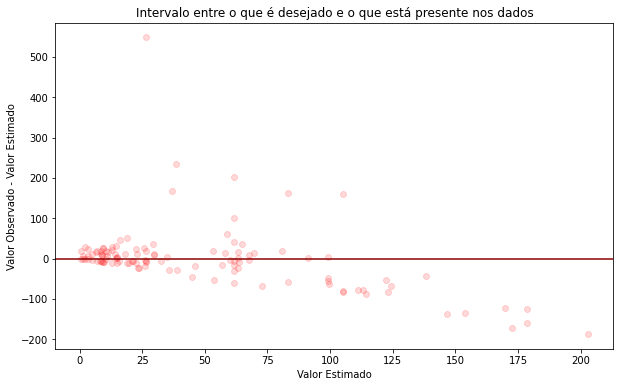

In [ ]:
differencePlot(y_test, knn_reg_pre, 'red', 'darkred')

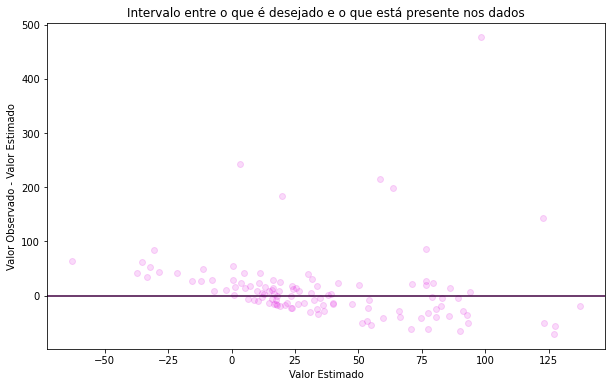

In [ ]:
differencePlot(y_test, lr_reg_pre, '#df07df', '#400040')

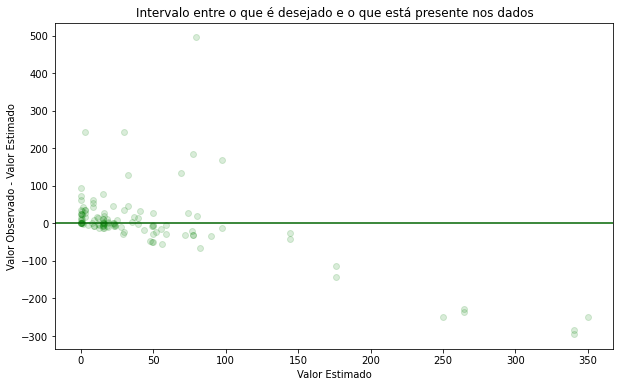

In [ ]:
differencePlot(y_test, dt_reg_pre, 'green', 'darkgreen')

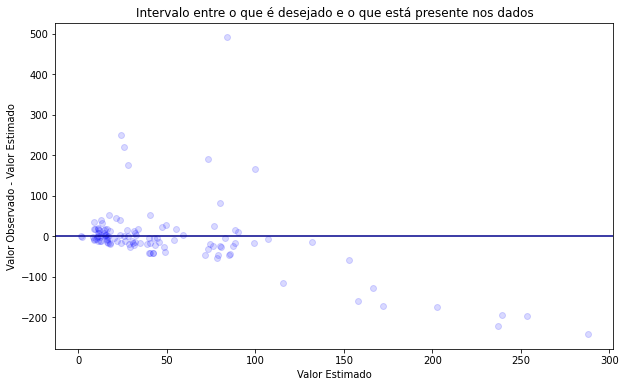

In [ ]:
differencePlot(y_test, rf_reg_pre, 'blue', 'darkblue')

# FASE 4B - TÉCNICAS DE MACHINE LEARNING - **TURBIDEZ**

**PARTE II - Turbidez**

In [ ]:
# Linear Regression
random.seed(10)
X = dfmod2.loc[:,dfmod2.columns != 'turb']
y = dfmod2.turb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 48)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

errors = y_pred - y_test
errors.shape

(116,)

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
scores = cross_val_score(reg, X, y, scoring='r2', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: -0.156 (0.756)


In [ ]:
y_pred = reg.predict(X_test)
result = pd.DataFrame({"prediction": y_pred, "actual_clorA": y_test})
result.sample(10)

,prediction,actual_clorA
225,10.379464,2.3
279,48.944642,32.0
203,36.437675,25.4
186,-15.304492,2.9
201,0.056578,2.4
78,-14.751432,4.2
223,-19.345708,18.5
117,27.121204,40.2
269,4.519240,7.0
39,-7.563121,8.9


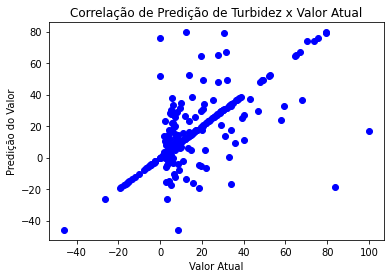

In [ ]:
predicao = y_pred
teste = result

plt.xlabel('Valor Atual')
plt.ylabel('Predição do Valor')
plt.title('Correlação de Predição de Turbidez x Valor Atual')
plt.plot(teste, predicao, 'bo')
plt.show()

In [ ]:
#=====================================#
# Model 01 ___ KNNeighbors Regressor
#=====================================#

In [ ]:
import statistics

resultado_final = {}

In [ ]:
random.seed(10)
modeloknn = KNeighborsRegressor(n_neighbors=3,metric='euclidean')
modeloknn.fit(X_train,y_train);

y_pred = modeloknn.predict(X_test);
knn_reg_pre = y_pred

# R Square Error
r2 = r2_score(y_test,y_pred);
r2 = str(round(r2, 2))
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,y_pred);
mae = str(round(mae, 2))
# Mean Square Error (MSE)
mse = mean_squared_error(y_test,y_pred, squared=True);
mse = str(round(mse, 2))
# Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_test,y_pred, squared=False);
rmse = str(round(rmse, 2))

print('KNN Regressor accuracy: ')
crossr = cross_val_score(estimator = modeloknn, X = X_train, y = y_train, cv = 5,verbose = 0)
crossr = str(round(statistics.mean(crossr), 2))

print("Cross val:", crossr)
print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

resultado_final['KNN'] = {'Cross val':crossr,'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

KNN Regressor accuracy: 
Cross val: -0.65
R2  : -0.56
MAE : 14.36
MSE : 483.22
RMSE: 21.98


In [ ]:
#=====================================#
# Model 02 ___ Linear Regressor
#=====================================#

In [ ]:
random.seed(10)
regressao = LinearRegression()
regressao.fit(X_train, y_train);

y_pred = regressao.predict(X_test);
lr_reg_pre = y_pred

r2 = r2_score(y_test,y_pred);
r2 = str(round(r2, 2))
mae = mean_absolute_error(y_test,y_pred);
mae = str(round(mae, 2))
mse = mean_squared_error(y_test,y_pred, squared=True);
mse = str(round(mse, 2))
rmse = mean_squared_error(y_test,y_pred, squared=False);
rmse = str(round(rmse, 2))

print('Linear Regression Regressor accuracy: ')
crossr = cross_val_score(estimator = regressao, X = X_train, y = y_train, cv = 5,verbose = 0)
crossr = str(round(statistics.mean(crossr), 2))

print("Cross val:", crossr)
print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

resultado_final['Linear Regression'] = {'Cross val':crossr,'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

Linear Regression Regressor accuracy: 
Cross val: -0.7
R2  : -1.01
MAE : 17.71
MSE : 619.4
RMSE: 24.89


In [ ]:
#=====================================#
# Model 03 ___ Decision Tree Regressor
#=====================================#

In [ ]:
random.seed(10)
modelo_dt = DecisionTreeRegressor(random_state=26)
modelo_dt.fit(X_train, y_train);

y_pred = modelo_dt.predict(X_test);
dt_reg_pre = y_pred

r2 = r2_score(y_test,y_pred);
r2 = str(round(r2, 2))
mae = mean_absolute_error(y_test,y_pred);
mae = str(round(mae, 2))
mse = mean_squared_error(y_test,y_pred, squared=True);
mse = str(round(mse, 2))
rmse = mean_squared_error(y_test,y_pred, squared=False);
rmse = str(round(rmse, 2))

print('Decision Tree Regressor accuracy: ')
crossr = cross_val_score(estimator = modelo_dt, X = X_train, y = y_train, cv = 5,verbose = 0)
crossr = str(round(statistics.mean(crossr), 2))

print('Cross val:',crossr)
print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

resultado_final['Decision Tree'] = {'Cross val':crossr,'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

Decision Tree Regressor accuracy: 
Cross val: -1.26
R2  : -3.52
MAE : 20.09
MSE : 1395.43
RMSE: 37.36


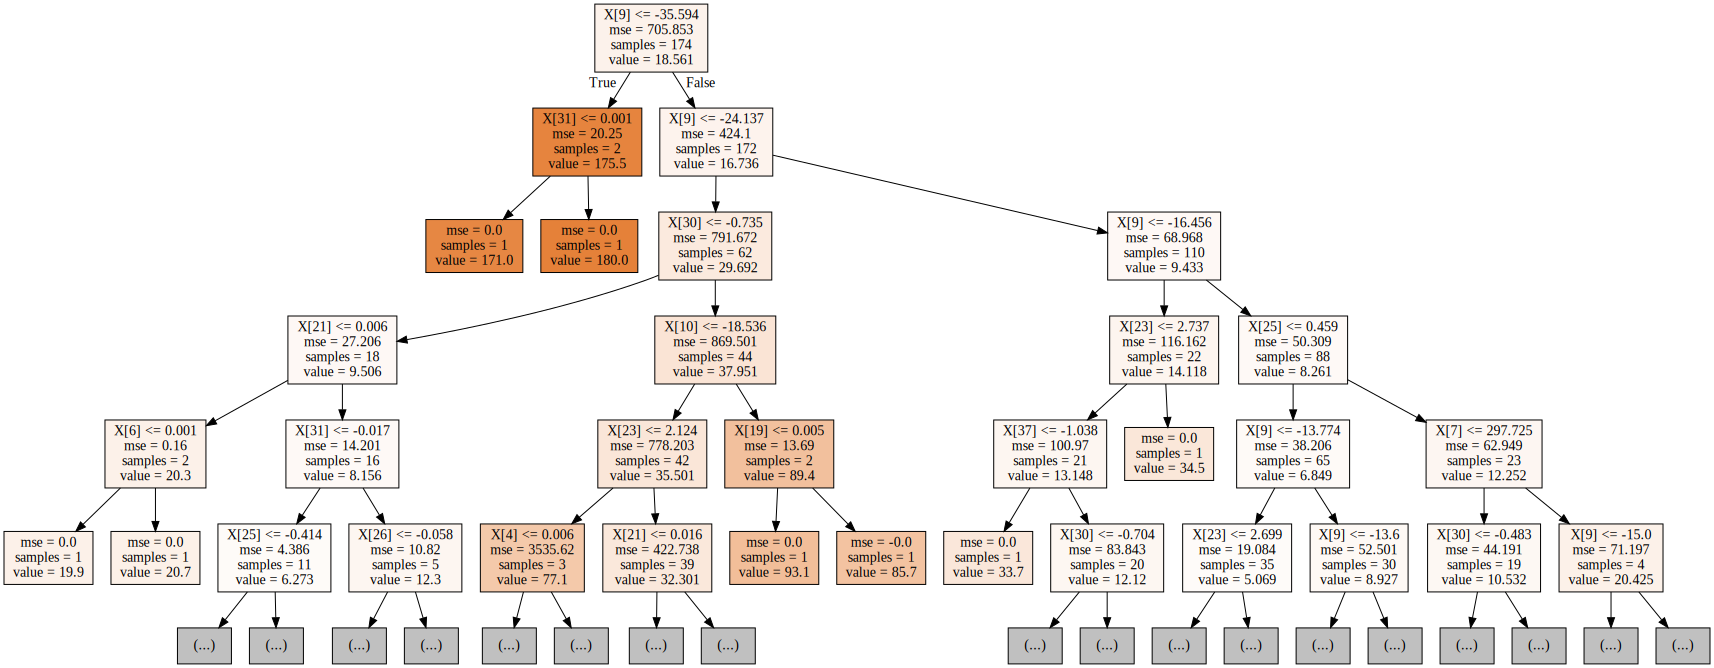

In [ ]:
dot_data = tree.export_graphviz(modelo_dt,max_depth=5, out_file=None,filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph


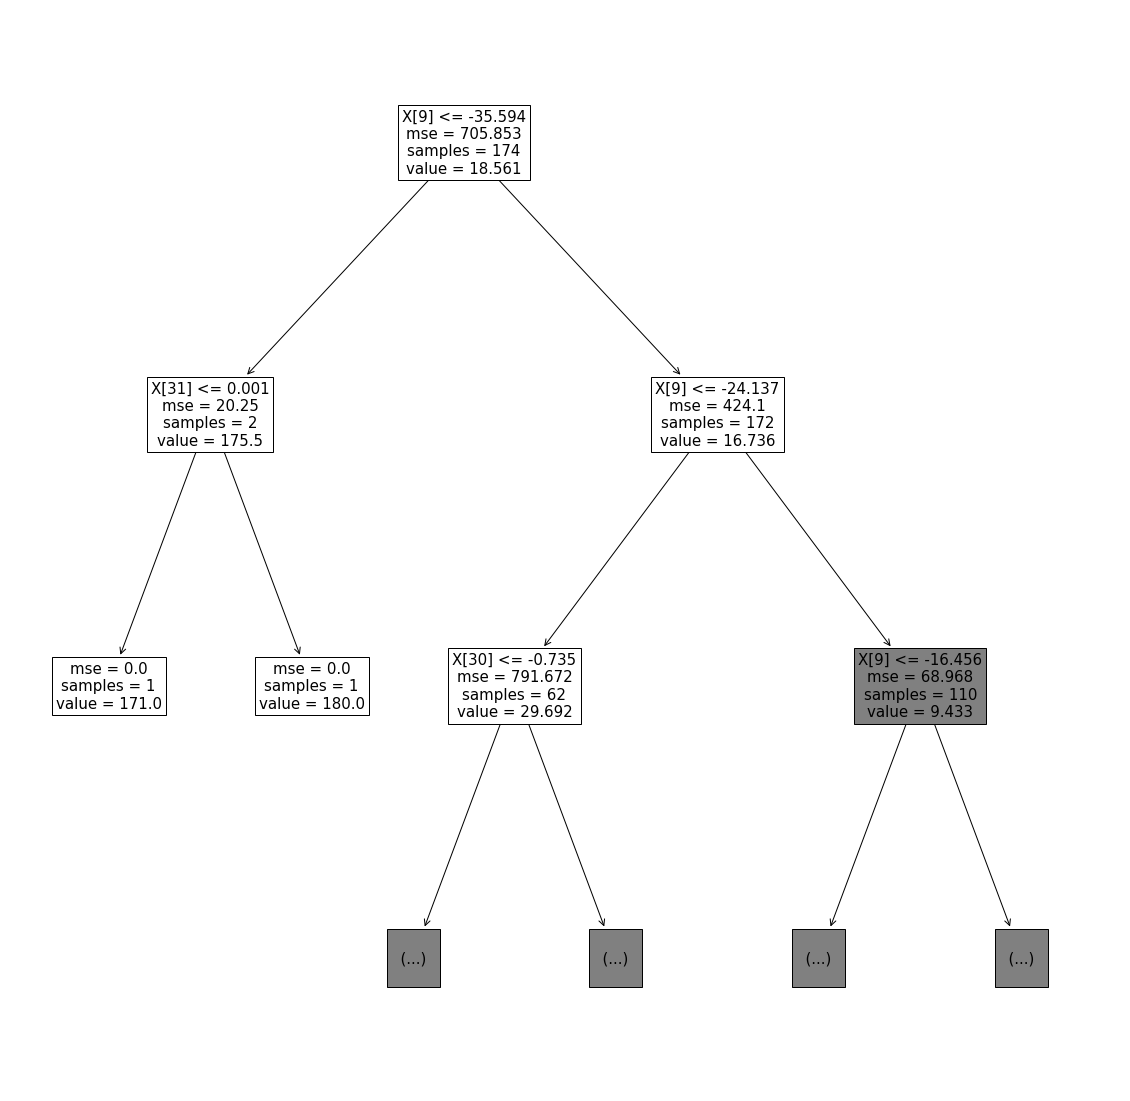

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(modelo_dt, max_depth = 2, fontsize=15)
plt.show()

In [ ]:
#=====================================#
# Model 04 ___ Random Forest Regressor
#=====================================#

In [ ]:
random.seed(10)
modelo_rf = RandomForestRegressor(n_estimators = 10)
modelo_rf.fit(X_train, y_train);

y_pred = modelo_rf.predict(X_test);
rf_reg_pre = y_pred

r2 = r2_score(y_test,y_pred);
r2 = str(round(r2, 2))
mae = mean_absolute_error(y_test,y_pred);
mae = str(round(mae, 2))
mse = mean_squared_error(y_test,y_pred, squared=True);
mse = str(round(mse, 2))
rmse = mean_squared_error(y_test,y_pred, squared=False);
rmse = str(round(rmse, 2))

print('Random Forest Regressor accuracy: ')
crossr = cross_val_score(estimator = modelo_rf, X = X_train, y = y_train, cv = 5,verbose = 0)
crossr = str(round(statistics.mean(crossr), 2))

print('Cross val:',crossr)
print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

resultado_final['Random Forest'] = {'Cross val':crossr,'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

Random Forest Regressor accuracy: 
Cross val: -0.21
R2  : -1.75
MAE : 16.57
MSE : 850.33
RMSE: 29.16


In [ ]:
pd.DataFrame(resultado_final).T

,Cross val,R2,MAE,MSE,RMSE
KNN,-0.65,-0.56,14.36,483.22,21.98
Linear Regression,-0.7,-1.01,17.71,619.4,24.89
Decision Tree,-1.26,-3.52,20.09,1395.43,37.36
Random Forest,-0.21,-1.75,16.57,850.33,29.16


In [ ]:
# Função de diferença entre os algoritmos
def differencePlot(y_test, y_predict, c1, c2):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel = 'Valor Estimado', ylabel = 'Valor Observado - Valor Estimado', 
           title = 'Intervalo entre o que é desejado e o que está presente nos dados')
    ax.scatter(y_predict, y_test - y_predict, alpha = 0.15, color = c1)
    ax.axhline(y = 0, color = c2)

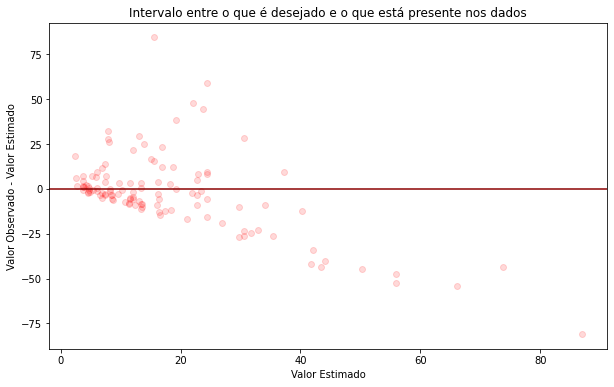

In [ ]:
differencePlot(y_test, knn_reg_pre, 'red', 'darkred')

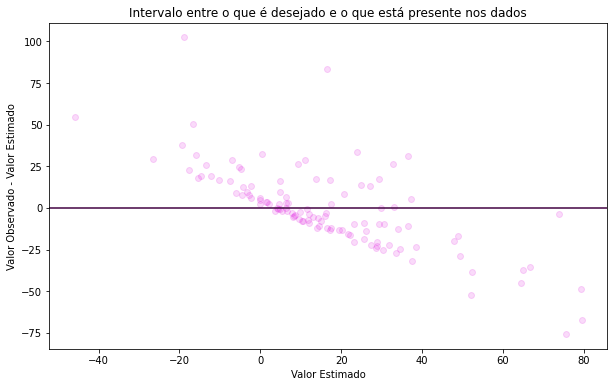

In [ ]:
differencePlot(y_test, lr_reg_pre, '#df07df', '#400040')

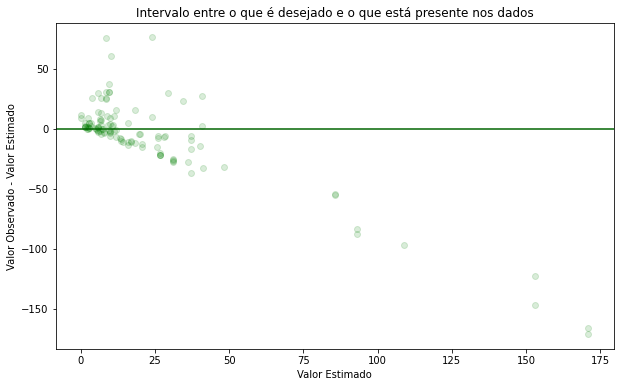

In [ ]:
differencePlot(y_test, dt_reg_pre, 'green', 'darkgreen')

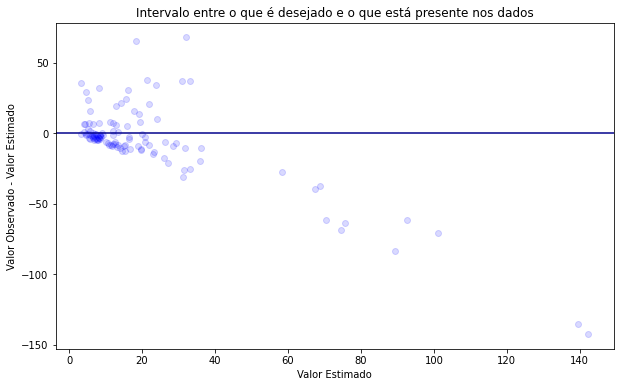

In [ ]:
differencePlot(y_test, rf_reg_pre, 'blue', 'darkblue')